<a href="https://colab.research.google.com/github/Vinsocf/CapstoneProject/blob/main/M6_NB_MiniProject_4_Finance_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### MiniProject 4: Finance Portfolio

## Learning Objectives

At the end of the experiment, you will be able to:

* build a finance portfolio
* optimize and find the maximum return, minimum risk of a portfolio
* cluster the asset parameters to group the similar assets
* select the optimal portfolio of diversified assets


## Dataset

Dataset chosen for this mini project is Dow Jones Industrial Average (DJIA) Index viz., Apple (AAPL), American Express (AXP), Boeing (BA), Caterpillar (CAT), Cisco Systems (CSCO), Chevron (CVX), Walt Disney (DIS), Goldman Sachs (GS), The Home Depot (HD), IBM (IBM), Intel (INTC), Johnson & Johnson (JNJ), JP Morgan Chase (JPM), Coca-Cola (KO), McDonald's (MCD), 3M(MMM), Merck & Co (MRK), Microsoft (MSFT), Nike (NKE), Pfizer (PFE), Procter & Gamble (PG), Travelers (TRV), United Health Group (UNH), United Technologies (UTX), Verizon (V), Verizon (VZ), Walgreens Boots Alliance (WBA), Walmart (WMT), Exxon Mobil (XOM).

The data set considered is from April 11, 2014 to April 11, 2019. Fig. 3.4 illustrates a snapshot of the DJIA dataset.

![img](https://github.com/PaiViji/PythonFinance-PortfolioOptimization/raw/2bb0ae9f32f44ff66302ea33f53c02e746583a05/Lesson3_HeuristicPortfolioSelection/Lesson3Fig3_4.png)

 

## Information



The universe of stocks can truly baffle investors who wish to make the best selection of stocks for their portfolios. It is a daunting task to make a prudent selection of stocks, given the vastness of the choices and the diverse behavioural characteristics of each of these stocks with respect to itself and to one another

**Portfolio Return and Risk:**
Harry Markowtiz proposed a framework known as Mean-Variance Analysis which won him the 1990 Nobel Prize in Economics. The framework laid the foundation for what is known as the Modern Portfolio Theory, that views the *portfolio return* as the capital gain that can be expected by holding a portfolio and *portfolio risk* as the extent of capital losses that it can suffer possibly due to adverse market movements. Portfolio return and risk were modelled using the mean and variance of the portfolio's fluctuations respectively.

**Diversification Index:**
A Diversification Index quantifies diversification. There are several diversification indices discussed in the literature. Diversification Ratio proposed and patented by Yves Choueifaty in 2008 [CHO 08, CHO 13], is a diversification index of recent origin, built on the inter-dependence between assets of a portfolio. Diversification Ratio is the ratio of the weighted sum of individual asset volatilities to the portfolio's volatility.

**Efficient Frontier:** An efficient frontier is a set of investment portfolios that are expected to provide the highest returns at a given level of risk. A portfolio is said to be efficient if there is no other portfolio that offers higher returns for a lower or equal amount of risk. Where portfolios are located on the efficient frontier depends on the investor’s degree of risk tolerance.

**Sharpe Ratio:** The Sharpe ratio was developed by Nobel laureate William F. Sharpe and is used to help investors understand the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

## Objectives:

* How can the investor decide on which combination of assets is the best?
* How can diversification be ensured, when the assets belong to different sectors and therefore behave differently under varying market conditions?
* How would an investor determine the optimal weights, which will ensure maximum return risk for the portfolio invested in ?
* How would an investor know how much to invest in each one of the assets in the portfolio ?

## Grading = 10 Points

In [141]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/DJIA_Apr112014_Apr112019.csv

### Import required Packages 

In [142]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 

### Data Preparation (1 point)

In [143]:
#input stock dataset
StockFileName = '/content/DJIA_Apr112014_Apr112019.csv'

# YOUR CODE HERE

In [158]:
Rows = 1259  #excluding header
Columns = 29  #excluding date
portfolioSize = Columns #set portfolio size
#read stock prices 
df = pd.read_csv(StockFileName,  nrows= Rows)

#extract asset labels
assetLabels = df.columns[1:Columns+1].tolist()
print('k-portfolio 1 asset labels:\n', assetLabels)

#extract stock prices excluding header and trading dates
dfStockPrices = df.iloc[1:, 1:]

#store stock prices as an array
arStockPrices = np.asarray(dfStockPrices)
[rows, cols]= arStockPrices.shape
print('k-portfolio 1 dataset size:\n', rows, cols)
print('k-portfolio 1 stock prices:\n', arStockPrices)

k-portfolio 1 asset labels:
 ['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WBA', 'WMT', 'XOM']
k-portfolio 1 dataset size:
 1258 29
k-portfolio 1 stock prices:
 [[ 74.52571  85.5     123.25    ...  65.67     77.38     97.86   ]
 [ 73.99429  86.04    124.27    ...  66.01     76.88     98.68   ]
 [ 74.14429  87.4     126.04    ...  66.16     77.22     99.94   ]
 ...
 [199.5     109.85    369.04001 ...  54.5      98.69     81.93   ]
 [200.61999 110.16    364.94    ...  54.51     99.6      81.56   ]
 [198.95    109.85    370.16    ...  53.44    100.8      81.95   ]]


#### Data Summarization

* Remove Date column and summarize the data

In [145]:
df.describe

<bound method NDFrame.describe of           Date        AAPL         AXP  ...        WBA         WMT         XOM
0     11/04/14   74.230003   84.540001  ...  64.260002   76.500000   96.720001
1     14/04/14   74.525711   85.500000  ...  65.669998   77.379997   97.860001
2     15/04/14   73.994286   86.040001  ...  66.010002   76.879997   98.680000
3     16/04/14   74.144287   87.400002  ...  66.160004   77.220001   99.940002
4     17/04/14   74.991432   86.220001  ...  66.750000   77.660004  100.419998
...        ...         ...         ...  ...        ...         ...         ...
1254  05/04/19  197.000000  110.959999  ...  54.689999   98.830002   82.489998
1255  08/04/19  200.100006  110.699997  ...  55.060001   99.230003   83.000000
1256  09/04/19  199.500000  109.849998  ...  54.500000   98.690002   81.930000
1257  10/04/19  200.619995  110.160004  ...  54.509998   99.599998   81.559998
1258  11/04/19  198.949997  109.849998  ...  53.439999  100.800003   81.949997

[1259 rows x 30 c

#### Compute the stock returns

* Compute the mean of returns and covariance of returns

In [159]:
#function to compute stock returns
def StockReturnsComputing(StockPrice, Rows, Columns):
    
    import numpy as np
    
    StockReturn = np.zeros([Rows-1, Columns])
    for j in range(Columns):  # j: Assets
        for i in range(Rows-1):     #i: Daily Prices
            StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])

    return StockReturn

In [186]:
#compute asset returns
arReturns = StockReturnsComputing(arStockPrices, rows, cols)
arStockPrices = np.asarray(dfStockPrices)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)
print('k-portfolio 1 returns:\n', arReturns)
print('Size of the array of daily returns of stocks:\n', arReturns.shape)
print('Array of daily returns of stocks\n',  arReturns)

k-portfolio 1 returns:
 [[-0.713  0.632  0.828 ...  0.518 -0.646  0.838]
 [ 0.203  1.581  1.424 ...  0.227  0.442  1.277]
 [ 1.143 -1.35   1.492 ...  0.892  0.57   0.48 ]
 ...
 [-0.3   -0.768 -1.463 ... -1.017 -0.544 -1.289]
 [ 0.561  0.282 -1.111 ...  0.018  0.922 -0.452]
 [-0.832 -0.281  1.43  ... -1.963  1.205  0.478]]
Size of the array of daily returns of stocks:
 (1257, 29)
Array of daily returns of stocks
 [[-0.713  0.632  0.828 ...  0.518 -0.646  0.838]
 [ 0.203  1.581  1.424 ...  0.227  0.442  1.277]
 [ 1.143 -1.35   1.492 ...  0.892  0.57   0.48 ]
 ...
 [-0.3   -0.768 -1.463 ... -1.017 -0.544 -1.289]
 [ 0.561  0.282 -1.111 ...  0.018  0.922 -0.452]
 [-0.832 -0.281  1.43  ... -1.963  1.205  0.478]]


In [161]:
#compute mean returns and variance covariance matrix of returns

#set precision for printing results
np.set_printoptions(precision=5, suppress = True)

meanReturns = np.mean(arReturns, axis = 0)
print('Mean returns of k-portfolio 1:\n', meanReturns)
covReturns = np.cov(arReturns, rowvar=False)
print('\nVariance-Covariance matrix of returns of k-portfolio 1: \n')
print('Size  ', covReturns.shape, '\n', covReturns)

Mean returns of k-portfolio 1:
 [ 0.0009   0.00029  0.001    0.00039  0.00081  0.00016  0.0004   0.00033
  0.00085 -0.00016  0.00073  0.00032  0.0006   0.00019  0.00057  0.00044
  0.00036  0.001    0.0008   0.00034  0.00025  0.00043  0.00095  0.00019
  0.00101  0.00023 -0.00002  0.00029 -0.00006]

Variance-Covariance matrix of returns of k-portfolio 1: 

Size   (29, 29) 
 [[0.00024 0.00007 0.0001  0.0001  0.0001  0.00007 0.00007 0.0001  0.00007
  0.00007 0.00011 0.00005 0.00008 0.00003 0.00005 0.00007 0.00005 0.00012
  0.00008 0.00005 0.00004 0.00005 0.00008 0.00007 0.0001  0.00003 0.00007
  0.00004 0.00006]
 [0.00007 0.00016 0.00008 0.0001  0.00007 0.00006 0.00006 0.00011 0.00007
  0.00007 0.00007 0.00005 0.0001  0.00003 0.00004 0.00007 0.00006 0.00008
  0.00007 0.00005 0.00003 0.00005 0.00007 0.00007 0.00008 0.00003 0.00007
  0.00004 0.00005]
 [0.0001  0.00008 0.00023 0.00013 0.00009 0.00008 0.00007 0.00011 0.00007
  0.00008 0.0001  0.00006 0.0001  0.00004 0.00005 0.00009 0.00006 0.0

### Portfolio Return and Portfolio Risk ( 2 points)

* Apply equal weighted portfolio construction method to portfolio
* Obtain the annualized risk (%) and the expected annual return (%) of the portfolio



Let P be a portfolio comprising assets $A_1, A_2,...A_N$ with weights $W_1, W_2,...W_N$ and $r_1, r_2, ...r_N$ as the asset returns. The portfolio return r determined by a weighted summation of its individual asset returns is given by,
 $$r = W_1 . r_1 + W_2 . r_2 + .. W_N . r_N = \sum_{i=1}^N W_i . r_i $$

The annualized portfolio return assuming that the number of trading days in a year were $T_y$ ( for example, 261 out of 365 days in a year), is given by,

$$r_{Ann} = \Bigg( \sum_{i=1}^N W_i . r_i \Bigg) . T_y$$

Portfolio risk is the standard deviation of its returns and is given by,

$$ \sigma = \sqrt{\sum_i \sum_j W_i . W_j . \sigma_{ij}}$$


where $\sigma_{ij}$ is the covariance of returns between assets i and j of the portfolio, also referred to as the variance-covariance matrix of returns. Standard deviation is a prominent measure of dispersion of data borrowed from Statistics and describes the deviation or spread of the data from its mean. In the case of portfolios, standard deviation of its returns, which is its risk, helps to measure the consistency of the returns. The annualized portfolio risk in percentage,  $\sigma_{Ann}$ is given by,

$$ \sigma_{Ann} = \sqrt{ \Bigg(\sum_i \sum_j W_i . W_j . \sigma_{ij} \Bigg) . T_y}$$

where $T_y$ is the number of trading days in a year.



In [149]:
#trading days = 251
PortfolioSize = Columns
EqualWeightVector = np.ones((1,PortfolioSize))*(1.0/PortfolioSize)
EqWgtPortfolioRisk = np.sqrt(np.matmul((np.matmul(EqualWeightVector,covReturns)), \
                     np.transpose(EqualWeightVector)))
EqWgtAnnPortfolioRisk = EqWgtPortfolioRisk*np.sqrt(251)*100
EqWgtPortfolioReturn = np.matmul(EqualWeightVector, np.transpose(meanReturns))
EqWgtAnnPortfolioReturn = 251*EqWgtPortfolioReturn * 100

print("Annualized Portfolio Risk :  %4.2f" % EqWgtAnnPortfolioRisk, "%")
print("\nAnnualized Expected Portfolio Return:  %4.2f" %  EqWgtAnnPortfolioReturn,"%")

Annualized Portfolio Risk :  12.84 %

Annualized Expected Portfolio Return:  11.75 %


### Cluster the Assets using K-Means (2 points)

* Prepare the data for K-Means by concatenating mean returns and covariance returns

* Find the suitable k parameter and fit the model

* Label the nearest assets in clusters

In [150]:
""" prepare the data for k means clustering """
# YOUR CODE HERE

#reshape for concatenation
meanReturns = meanReturns.reshape(len(meanReturns),1)
assetParameters = np.concatenate([meanReturns, covReturns], axis = 1)
print('Size of the asset parameters for clustering:\n', assetParameters.shape)
print('Asset parameters for clustering:\n', assetParameters)

Size of the asset parameters for clustering:
 (29, 30)
Asset parameters for clustering:
 [[ 0.0009   0.00024  0.00007  0.0001   0.0001   0.0001   0.00007  0.00007
   0.0001   0.00007  0.00007  0.00011  0.00005  0.00008  0.00003  0.00005
   0.00007  0.00005  0.00012  0.00008  0.00005  0.00004  0.00005  0.00008
   0.00007  0.0001   0.00003  0.00007  0.00004  0.00006]
 [ 0.00029  0.00007  0.00016  0.00008  0.0001   0.00007  0.00006  0.00006
   0.00011  0.00007  0.00007  0.00007  0.00005  0.0001   0.00003  0.00004
   0.00007  0.00006  0.00008  0.00007  0.00005  0.00003  0.00005  0.00007
   0.00007  0.00008  0.00003  0.00007  0.00004  0.00005]
 [ 0.001    0.0001   0.00008  0.00023  0.00013  0.00009  0.00008  0.00007
   0.00011  0.00007  0.00008  0.0001   0.00006  0.0001   0.00004  0.00005
   0.00009  0.00006  0.00009  0.00008  0.00005  0.00004  0.00006  0.00007
   0.00009  0.00009  0.00004  0.00007  0.00005  0.00007]
 [ 0.00039  0.0001   0.0001   0.00013  0.00027  0.0001   0.00012  0.00007


In [151]:
""" kmeans clustering of assets using the characteristic vector of mean return and variance-covariance vector of returns """ 
# YOUR CODE HERE

clusters=15
assetsCluster= KMeans(algorithm='auto',  max_iter=600, n_clusters=clusters)
print('Clustering of assets completed!') 
assetsCluster.fit(assetParameters)
centroids = assetsCluster.cluster_centers_
labels = assetsCluster.labels_

print('Centroids:\n', centroids)
print('Labels:\n', labels)

Clustering of assets completed!
Centroids:
 [[ 0.00095  0.00008  0.00007  0.00007  0.00007  0.00007  0.00006  0.00006
   0.00008  0.00007  0.00006  0.00007  0.00006  0.00008  0.00003  0.00004
   0.00006  0.00006  0.00008  0.00007  0.00007  0.00004  0.00006  0.00017
   0.00006  0.00007  0.00004  0.00008  0.00005  0.00005]
 [ 0.00034  0.00005  0.00005  0.00006  0.00006  0.00006  0.00005  0.00004
   0.00006  0.00005  0.00005  0.00006  0.00007  0.00006  0.00004  0.00004
   0.00006  0.0001   0.00006  0.00005  0.00009  0.00004  0.00005  0.00006
   0.00005  0.00006  0.00004  0.00006  0.00004  0.00005]
 [-0.00002  0.00007  0.00007  0.00007  0.00007  0.00007  0.00006  0.00006
   0.00008  0.00007  0.00005  0.00007  0.00006  0.00007  0.00004  0.00004
   0.00006  0.00006  0.00008  0.00007  0.00006  0.00004  0.00006  0.00008
   0.00006  0.00007  0.00005  0.00026  0.00006  0.00005]
 [ 0.00033  0.0001   0.00011  0.00011  0.00013  0.00009  0.00009  0.00008
   0.00021  0.00008  0.00008  0.0001   0.0000

In [152]:
""" fix asset labels to cluster points """
# YOUR CODE HERE

print('Stocks in each of the clusters:\n',)
assets = np.array(assetLabels)
for i in range(clusters):
    print('Cluster', i+1)
    clt  = np.where(labels == i)
    assetsCluster = assets[clt]
    print(assetsCluster)

Stocks in each of the clusters:

Cluster 1
['UNH']
Cluster 2
['JNJ' 'MRK' 'PFE']
Cluster 3
['WBA']
Cluster 4
['GS']
Cluster 5
['IBM' 'XOM']
Cluster 6
['CSCO' 'INTC']
Cluster 7
['DIS' 'MMM' 'TRV']
Cluster 8
['AXP' 'CVX' 'UTX']
Cluster 9
['BA' 'MSFT' 'V']
Cluster 10
['MCD']
Cluster 11
['HD' 'NKE']
Cluster 12
['KO' 'PG' 'VZ' 'WMT']
Cluster 13
['AAPL']
Cluster 14
['JPM']
Cluster 15
['CAT']


### Diversification Index (1 point)

* Compute the Diversification Ratio of the Equal Weighted Portfolio

Let N be the number of assets in the portfolio spanning different asset classes or belonging to a specific class. Let $(\bar{w}=(w_1,w_2,...w_N) )$ be the weights or the proportion of capital to be invested in individual assets in the portfolio and $\bar{w}'$ its transpose. Let $(\bar{\sigma}=(\sigma_1,\sigma_2,...\sigma_N))$ be the standard deviations of returns on the assets and V, the variance-covariance matrix of returns on the assets. The Diversification Ratio of a portfolio is given as follows:

$$ \Bigg( \frac{\bar\sigma . \bar w'}{\sqrt{\bar w . V . \bar w'}}\Bigg)$$



In [153]:
# Equal weighted portfolio: Diversification Ratio
EqWgtPortfolioAssetStdDev = np.sqrt(np.diagonal(covReturns))
EqWgtPortfolioDivRatio = np.sum(np.multiply(EqWgtPortfolioAssetStdDev, EqualWeightVector)) \
                         / EqWgtPortfolioRisk
print("\n Equal Weighted Portfolio:Diversification Ratio  %4.2f" % EqWgtPortfolioDivRatio)


 Equal Weighted Portfolio:Diversification Ratio  1.57


In [154]:
EqWgtPortfolioAssetStdDev

array([0.01541, 0.01284, 0.01513, 0.01653, 0.01338, 0.0139 , 0.01162,
       0.01454, 0.01179, 0.01278, 0.01587, 0.01001, 0.01305, 0.00898,
       0.01042, 0.01113, 0.01227, 0.01457, 0.01487, 0.01109, 0.00947,
       0.01028, 0.01312, 0.0114 , 0.01306, 0.01076, 0.01598, 0.01228,
       0.01189])

In [155]:
EqualWeightVector

array([[0.03448, 0.03448, 0.03448, 0.03448, 0.03448, 0.03448, 0.03448,
        0.03448, 0.03448, 0.03448, 0.03448, 0.03448, 0.03448, 0.03448,
        0.03448, 0.03448, 0.03448, 0.03448, 0.03448, 0.03448, 0.03448,
        0.03448, 0.03448, 0.03448, 0.03448, 0.03448, 0.03448, 0.03448,
        0.03448]])

In [156]:
np.multiply(EqWgtPortfolioAssetStdDev, EqualWeightVector)

array([[0.00053, 0.00044, 0.00052, 0.00057, 0.00046, 0.00048, 0.0004 ,
        0.0005 , 0.00041, 0.00044, 0.00055, 0.00035, 0.00045, 0.00031,
        0.00036, 0.00038, 0.00042, 0.0005 , 0.00051, 0.00038, 0.00033,
        0.00035, 0.00045, 0.00039, 0.00045, 0.00037, 0.00055, 0.00042,
        0.00041]])

### Inverse Volatility Weighted Portfolio (1 point)

* Apply inverse volatility weighted portfolio construction method for the DJIA portfolio
* Compute Inverse volatility weighted portfolio annual risk
* Compute Inverse volatility weighted portfolio annual return
* Compute the Diversification Ratio of the Inverse Volatility Weighted Portfolio

An inverse volatility weighted portfolio is one in which highly volatile assets are allotted smaller weights and low volatile assets are allotted larger weights. Thus, the weights of the individual assets in the portfolio are proportional to the reciprocals of their individual volatilities.
The weights are given by,

$$W_i = \frac{\frac{1}{\sigma_i}}{\sum_j \frac{1}{\sigma_j}} $$

In [162]:
#Inverse volatility weighted portfolio construction: Annualized risk and 
#Expected annualized portfolio return
#Trading days = 251
InvVolWeightAssets_Risk = np.sqrt(np.diagonal(covReturns))
InvVolWeightAssets_ReciprocalRisk = 1.0/InvVolWeightAssets_Risk
InvVolWeightAssets_ReciprocalRisk_Sum = np.sum(InvVolWeightAssets_ReciprocalRisk)
InvVolWeightAssets_Weights = InvVolWeightAssets_ReciprocalRisk / \
                             InvVolWeightAssets_ReciprocalRisk_Sum
InvVolWeightPortfolio_Risk = np.sqrt(np.matmul((np.matmul(InvVolWeightAssets_Weights,\
                             covReturns)), np.transpose(InvVolWeightAssets_Weights)))

#annualized risk and return
InvVolWeightPortfolio_AnnRisk = np.sqrt(251)* InvVolWeightPortfolio_Risk *100
InvVolWeightPortfolio_AnnReturn = 251* np.matmul(InvVolWeightAssets_Weights,\
                                  np.transpose(meanReturns)) *100

print("Annualized Portfolio Risk: %4.2f" % InvVolWeightPortfolio_AnnRisk,"%\n")
print("Annualized Expected Portfolio Return: %4.2f" % InvVolWeightPortfolio_AnnReturn,"%")

Annualized Portfolio Risk: 12.47 %

Annualized Expected Portfolio Return: 11.29 %


In [163]:
""" Inverse volatility weighted portfolio: Diversification Ratio"""
# YOUR CODE HERE
InvVolWeightAssets_Risk= np.sqrt(np.diagonal(covReturns))
InvVolWeightPortfolioDivRatio = \
np.sum(np.multiply(InvVolWeightAssets_Risk, InvVolWeightAssets_Weights))\
/ InvVolWeightPortfolio_Risk
print("\n Inverse Volatility  Weighted Portfolio:Diversification Ratio %4.2f" \
      % InvVolWeightPortfolioDivRatio)


 Inverse Volatility  Weighted Portfolio:Diversification Ratio 1.57


### Efficient Frontier (2 points)
**Optimize the portfolio weights:**

* Initialize the random weights for each portfolio
* Calculate return, volatility for each portfolio


The efficient set obtained by the Mean-Variance Optimization model can be graphically represented by what is called an efficient frontier. An efficient frontier is a risk-return tradeoff graph, which describes a set of optimal portfolios that yield the highest expected portfolio return for a defined level of risk or the lowest possible risk for a defined level of expected portfolio return. It graphs the optimal structure of the portfolio which yields the maximum expected return for a given level of risk or vice-versa.


In [164]:

#function obtains maximal return portfolio using linear programming

def MaximizeReturns(MeanReturns, PortfolioSize):
    
    #dependencies
    from scipy.optimize import linprog
    import numpy as np
    
    c = (np.multiply(-1, MeanReturns))
    A = np.ones([PortfolioSize,1]).T
    b=[1]
    res = linprog(c, A_ub = A, b_ub = b, bounds = (0,1), method = 'simplex') 
    
    return res

In [165]:

#function obtains minimal risk portfolio 

#dependencies
import numpy as np
from scipy import optimize 

def MinimizeRisk(CovarReturns, PortfolioSize):
    
    def  f(x, CovarReturns):
        func = np.matmul(np.matmul(x, CovarReturns), x.T) 
        return func

    def constraintEq(x):
        A=np.ones(x.shape)
        b=1
        constraintVal = np.matmul(A,x.T)-b 
        return constraintVal
    
    xinit=np.repeat(0.1, PortfolioSize)
    cons = ({'type': 'eq', 'fun':constraintEq})
    lb = 0
    ub = 1
    bnds = tuple([(lb,ub) for x in xinit])

    opt = optimize.minimize (f, x0 = xinit, args = (CovarReturns),  bounds = bnds, \
                             constraints = cons, tol = 10**-3)
    
    return opt

In [167]:
#function obtains Minimal risk and Maximum return portfolios

#dependencies
from scipy import optimize 

def MinimizeRiskConstr(MeanReturns, CovarReturns, PortfolioSize, R):
    
    def  f(x,CovarReturns):
         
        func = np.matmul(np.matmul(x,CovarReturns ), x.T)
        return func

    def constraintEq(x):
        AEq=np.ones(x.shape)
        bEq=1
        EqconstraintVal = np.matmul(AEq,x.T)-bEq 
        return EqconstraintVal
    
    def constraintIneq(x, MeanReturns, R):
        AIneq = np.array(MeanReturns)
        bIneq = R
        IneqconstraintVal = np.matmul(AIneq,x.T) - bIneq
        return IneqconstraintVal
    

    xinit=np.repeat(0.1, PortfolioSize)
    cons = ({'type': 'eq', 'fun':constraintEq},
            {'type':'ineq', 'fun':constraintIneq, 'args':(MeanReturns,R) })
    lb = 0
    ub = 1
    bnds = tuple([(lb,ub) for x in xinit])

    opt = optimize.minimize (f, args = (CovarReturns), method ='trust-constr',  \
                        x0 = xinit,   bounds = bnds, constraints = cons, tol = 10**-3)
    
    return  opt

In [168]:
# function computes asset returns 
def StockReturnsComputing(StockPrice, Rows, Columns):
    
    import numpy as np
    
    StockReturn = np.zeros([Rows-1, Columns])
    for j in range(Columns):        # j: Assets
        for i in range(Rows-1):     # i: Daily Prices
            StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])* 100

    return StockReturn

In [169]:
df = pd.read_csv(StockFileName,  nrows= Rows)

Rows = 1259  #excluding header
Columns = 29  #excluding date
portfolioSize = Columns #set portfolio size


#extract asset labels
assetLabels = df.columns[1:Columns+1].tolist()
print(assetLabels)

#extract asset prices
StockData = df.iloc[0:, 1:]


#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)


#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)


['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WBA', 'WMT', 'XOM']


In [171]:
#Maximal expected portfolio return computation for the k-portfolio
result1 = MaximizeReturns(meanReturns, portfolioSize)
maxReturnWeights = result1.x
maxExpPortfolioReturn = np.matmul(meanReturns.T, maxReturnWeights)
print("Maximal Expected Portfolio Return:   %7.4f" % maxExpPortfolioReturn )

Maximal Expected Portfolio Return:    0.1013


In [172]:
#expected portfolio return computation for the minimum risk k-portfolio 
result2 = MinimizeRisk(covReturns, portfolioSize)
minRiskWeights = result2.x
minRiskExpPortfolioReturn = np.matmul(meanReturns.T, minRiskWeights)
print("Expected Return of Minimum Risk Portfolio:  %7.4f" % minRiskExpPortfolioReturn)

Expected Return of Minimum Risk Portfolio:   0.0306


employing function MinimizeRiskConstr. The following Python code shows the repeated invocation of the function controlled by a while loop that varies from low to high in steps of increment = 0.001. Here low and high denote $R^{MinRisk}$ and $R^{MaxReturn}$ respectively. The loop therefore executes (5.6) repeatedly varying R as defined by $R^{MinRisk} \le R \le R^{MaxRetrn}$

In [173]:
#compute efficient set for the maximum return and minimum risk portfolios
increment = 0.001
low = minRiskExpPortfolioReturn
high = maxExpPortfolioReturn

#initialize optimal weight set and risk-return point set
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]

#repeated execution of function MinimizeRiskConstr to determine the efficient set 
while (low < high):
    
    result3 = MinimizeRiskConstr(meanReturns, covReturns, portfolioSize, low)
    xOptimal.append(result3.x)
    expPortfolioReturnPoint.append(low)
    low = low+increment
    
#gather optimal weight set    
xOptimalArray = np.array(xOptimal)

#obtain annualized risk for the efficient set portfolios 
#for trading days = 251
minRiskPoint = np.diagonal(np.matmul((np.matmul(xOptimalArray,covReturns)),\
                                     np.transpose(xOptimalArray)))
riskPoint =   np.sqrt(minRiskPoint*251) 

#obtain expected portfolio annualized return for the 
#efficient set portfolios, for trading days = 251
retPoint = 251*np.array(expPortfolioReturnPoint) 

#display efficient set portfolio parameters
print("Size of the  efficient set:", xOptimalArray.shape )
print("Optimal weights of the efficient set portfolios: \n", xOptimalArray)
print("Annualized Risk and Return of the efficient set portfolios: \n", \
                                                np.c_[riskPoint, retPoint])

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


Size of the  efficient set: (71, 29)
Optimal weights of the efficient set portfolios: 
 [[ 0.021  0.026  0.016 ...  0.017  0.045  0.027]
 [ 0.021  0.026  0.016 ...  0.017  0.045  0.027]
 [ 0.022  0.026  0.016 ...  0.017  0.045  0.026]
 ...
 [ 0.004  0.001  0.212 ...  0.     0.001  0.   ]
 [ 0.003  0.     0.228 ...  0.     0.     0.   ]
 [ 0.002 -0.     0.21  ... -0.    -0.    -0.   ]]
Annualized Risk and Return of the efficient set portfolios: 
 [[11.375  7.688]
 [11.381  7.939]
 [11.388  8.19 ]
 [11.396  8.441]
 [11.405  8.692]
 [11.415  8.943]
 [11.423  9.194]
 [11.428  9.445]
 [11.439  9.696]
 [11.832  9.947]
 [11.466 10.198]
 [11.485 10.449]
 [11.555 10.7  ]
 [11.589 10.951]
 [11.628 11.202]
 [11.672 11.453]
 [11.72  11.704]
 [11.828 11.955]
 [11.883 12.206]
 [11.937 12.457]
 [11.983 12.708]
 [12.005 12.959]
 [11.864 13.21 ]
 [11.914 13.461]
 [11.976 13.712]
 [12.118 13.963]
 [12.04  14.214]
 [12.1   14.465]
 [12.169 14.716]
 [12.229 14.967]
 [12.284 15.218]
 [12.356 15.469]
 [12.4

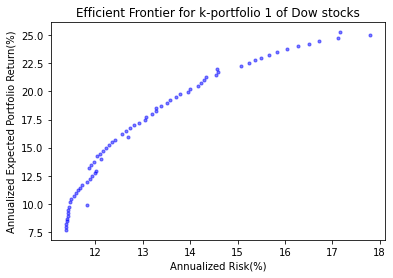

In [174]:
# YOUR CODE HERE
#Graph Efficient Frontier
import matplotlib.pyplot as plt

NoPoints = riskPoint.size

colours = "blue"
area = np.pi*3

plt.title('Efficient Frontier for k-portfolio  of Dow stocks')
plt.xlabel('Annualized Risk(%)')
plt.ylabel('Annualized Expected Portfolio Return(%)' )
plt.scatter(riskPoint, retPoint, s=area, c=colours, alpha =0.5)
plt.show()

#### Visualize Efficient Frontier

* Visualize the volatility and returns of 1000 portfolios
* Find the minimum variance portfolio and plot the weights of assets

In [ ]:
# YOUR CODE HERE

### Sharpe Ratio (1 point)

* Calculate Sharpe Ratio for the assets

Sharpe Ratio, developed by Nobel Laureate William F Sharpe, is a measure of calculating risk adjusted return. It serves to help investors know about the returns on their investments relative to the risks they hold. The Sharpe Ratio is defined as

$$Sharpe Ratio = \frac{R_P - R_f}{\sigma_p} $$

where:

$R_p$ = return of portfolio

$R_f$ = risk-free rate

$\sigma_p$ = standard deviation of the portfolio’s excess return
​	

**Note:** The risk-free rate of return is the return of an investment with zero risks, meaning it's the return investors could expect for taking no risk.



In [175]:
#function to undertake Sharpe Ratio maximization subject to 
#basic constraints of the portfolio

#dependencies
import numpy as np
from scipy import optimize 

def MaximizeSharpeRatioOptmzn(MeanReturns, CovarReturns, RiskFreeRate, PortfolioSize):
    
    # define maximization of Sharpe Ratio using principle of duality
    def  f(x, MeanReturns, CovarReturns, RiskFreeRate, PortfolioSize):
        funcDenomr = np.sqrt(np.matmul(np.matmul(x, CovarReturns), x.T) )
        funcNumer = np.matmul(np.array(MeanReturns),x.T)-RiskFreeRate
        func = -(funcNumer / funcDenomr)
        return func

    #define equality constraint representing fully invested portfolio
    def constraintEq(x):
        A=np.ones(x.shape)
        b=1
        constraintVal = np.matmul(A,x.T)-b 
        return constraintVal
    
    
    #define bounds and other parameters
    xinit=np.repeat(0.33, PortfolioSize)
    cons = ({'type': 'eq', 'fun':constraintEq})
    lb = 0
    ub = 1
    bnds = tuple([(lb,ub) for x in xinit])
    
    #invoke minimize solver
    opt = optimize.minimize (f, x0 = xinit, args = (MeanReturns, CovarReturns,\
                             RiskFreeRate, PortfolioSize), method = 'SLSQP',  \
                             bounds = bnds, constraints = cons, tol = 10**-3)
    
    return opt

In [176]:
# Risk-free return
#rf = 0.0006
# YOUR CODE HERE
#obtain maximal Sharpe Ratio for k-portfolio 1 of Dow stocks

#set portfolio size
portfolioSize = Columns

#set risk free asset rate of return
Rf=0.0006  # April 2019 average risk  free rate of return in USA approx 3%
annRiskFreeRate = Rf/100

#compute daily risk free rate in percentage
r0 = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
print('\nRisk free rate (daily %): ', end="")
print ("{0:.3f}".format(r0)) 

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]
maxSharpeRatio = 0

#compute maximal Sharpe Ratio and optimal weights
result = MaximizeSharpeRatioOptmzn(meanReturns, covReturns, r0, portfolioSize)
xOptimal.append(result.x)

    
#compute risk returns and max Sharpe Ratio of the optimal portfolio   
xOptimalArray = np.array(xOptimal)
Risk = np.matmul((np.matmul(xOptimalArray,covReturns)), np.transpose(xOptimalArray))
expReturn = np.matmul(np.array(meanReturns),xOptimalArray.T)
annRisk =   np.sqrt(Risk*251) 
annRet = 251*np.array(expReturn) 
maxSharpeRatio = (annRet-Rf)/annRisk 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)


#display results
print('Maximal Sharpe Ratio: ', maxSharpeRatio, '\nAnnualized Risk (%):  ', \
      annRisk, '\nAnnualized Expected Portfolio Return(%):  ', annRet)
print('\nOptimal weights (%):\n',  xOptimalArray.T*100 )



Risk free rate (daily %): 0.000
Maximal Sharpe Ratio:  [[1.506]] 
Annualized Risk (%):   [[14.872]] 
Annualized Expected Portfolio Return(%):   [22.393]

Optimal weights (%):
 [[ 8.112]
 [ 0.   ]
 [12.652]
 [ 0.   ]
 [ 6.136]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [13.205]
 [ 0.   ]
 [ 0.088]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [10.07 ]
 [ 0.   ]
 [ 0.   ]
 [ 9.798]
 [ 8.053]
 [ 0.   ]
 [ 0.   ]
 [ 0.292]
 [17.006]
 [ 0.   ]
 [14.587]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]]


#### Plot the portfolio

* Find and plot the optimal portfolio using Sharpe Ratio
* Highlight the minimum risk and maximum return of the portfolio

In [185]:

def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    #print "-"*80
 #   print "Maximum Sharpe Ratio Portfolio Allocation\n"
    print "Annualised Return:", round(rp,2)
    print "Annualised Volatility:", round(sdp,2)
    print "\n"
    print max_sharpe_allocation
    print "-"*80
    print "Minimum Volatility Portfolio Allocation\n"
    print "Annualised Return:", round(rp_min,2)
    print "Annualised Volatility:", round(sdp_min,2)
    print "\n"
    print min_vol_allocation
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

SyntaxError: ignored

In [179]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

TypeError: ignored

In [180]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

NameError: ignored

In [177]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [178]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

NameError: ignored

In [ ]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [ ]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

In [ ]:
# YOUR CODE HERE
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

### Report Analysis

* Try with a subset of assets and comment on diversification ratio

* Comment on the portfolio that consists of assets with highest return (irrespective of risk)

* Discuss the optimized portfolio and weights of the assets

* Based on K-Means clusters, find the subset of assets which is exhibiting greater sharpe ratio
